In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import tools

sc.logging.print_header()

os.chdir(os.path.expanduser('/home/jovyan/Zach/scanpy/'))
adata = sc.read_h5ad('h5ad/meninges_integrated.h5ad')
bdata = sc.read_h5ad('h5ad/meninges_integrated_b_cells.h5ad')

scanpy==1.8.2 anndata==0.7.6 umap==0.5.1 numpy==1.21.6 scipy==1.5.2 pandas==1.3.5 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 leidenalg==0.8.2 pynndescent==0.5.2


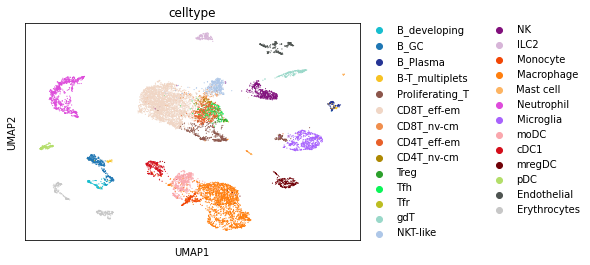

In [2]:
palette = {'B_developing':'#17becf',
'B_GC':'#1f77b4',
'B_Plasma':'#253494',
'B-T_multiplets':'#f7c223',
'Proliferating_T':'#8c564b',
'CD8T_eff-em':'#f0d6c5',
'CD8T_nv-cm':'#f08e4d',
'CD4T_eff-em':'#e8602a',
'CD4T_nv-cm':'#ad8802',
'Treg':'#2ca02c',
'Tfh':'#0af558',
'Tfr':'#bcbd22',
'gdT':'#99d8c9',
'NKT-like':'#aec7e8',
'NK':'#810f7c',
'ILC2':'#d7b5d8',
'Monocyte':'#f24605',
'Macrophage':'#ff7f0e',
'Mast cell':'#fdb462',
'Neutrophil':'#de4bdb',
'Microglia':'#a862fd',
'moDC':'#faa7ad',
'cDC1':'#d40d1a',
'mregDC':'#700107',
'pDC':'#b3de69',
'Endothelial':'#4e5451',
'Erythrocytes':'#c7c7c7',}
adata.obs['celltype'] = adata.obs['celltype'].cat.reorder_categories(palette.keys())
sc.pl.umap(adata, color = 'celltype', palette = palette, size = 5)

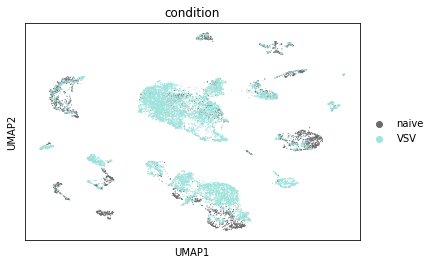

In [3]:
palette2 = {'naive':'#6b6b6b', 'VSV': '#9fe3dd'}
adata.obs['condition'] = adata.obs['condition'].cat.reorder_categories(['naive', 'VSV'])
sc.pl.umap(adata, color = 'condition', palette = palette2, size = 5)

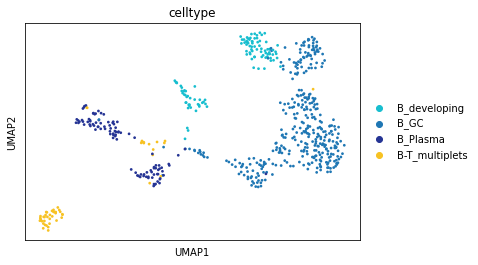

In [4]:
bdata.obs['celltype'] = bdata.obs['celltype'].cat.reorder_categories(['B_developing', 'B_GC', 'B_Plasma', 'B-T_multiplets'])
sc.pl.umap(bdata, color = 'celltype', palette = palette, size = 30)

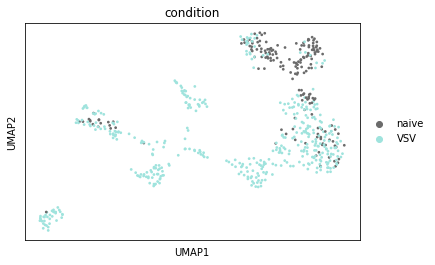

In [5]:
bdata.obs['condition'] = bdata.obs['condition'].cat.reorder_categories(['naive', 'VSV'])
sc.pl.umap(bdata, color = 'condition', palette = palette2, size = 30)

In [6]:
adata.write_h5ad('h5ad/meninges_integrated.h5ad', compression = 'gzip')
bdata.write_h5ad('h5ad/meninges_integrated_b_cells.h5ad', compression = 'gzip')